# Python Project : Study case StarCraft II

## Library and data imports

Libraries for data analysis and machine learning models.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

Libraries for graphs and plots.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Read the data from : https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv

In [3]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv")

To be more comprehensive, we will add a LeagueName column.

In [4]:
league_names = {1 : 'Bronze', 2 : 'Silver', 3 : 'Gold', 4 : 'Platinum',
                5 : 'Diamond', 6 : 'Master', 7 : 'GrandMaster', 8 : 'Professional'}
data['LeagueName'] = data['LeagueIndex'].map(league_names)

Change order of the columns to be more presentable.

In [5]:
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = [cols[1]] + [cols[0]] + cols[2:]
data = data[cols]

## Data Analysis : preprocessing 

First thing to do is to get the information in our dataset : number of features/columns, null values and dtypes.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueName            3395 non-null   object 
 2   LeagueIndex           3395 non-null   int64  
 3   Age                   3395 non-null   object 
 4   HoursPerWeek          3395 non-null   object 
 5   TotalHours            3395 non-null   object 
 6   APM                   3395 non-null   float64
 7   SelectByHotkeys       3395 non-null   float64
 8   AssignToHotkeys       3395 non-null   float64
 9   UniqueHotkeys         3395 non-null   int64  
 10  MinimapAttacks        3395 non-null   float64
 11  MinimapRightClicks    3395 non-null   float64
 12  NumberOfPACs          3395 non-null   float64
 13  GapBetweenPACs        3395 non-null   float64
 14  ActionLatency         3395 non-null   float64
 15  ActionsInPAC         

Lucky us, we have no null data :) . So apparently, there is no gap in our data. 
<br>But, we can see that the dtype of columns Age, HoursPerWeek and TotalHours are object types. This is strange because they should be int or float. Let's see in details what they contains.

### Replace incoherent values

In [7]:
data['Age'].value_counts().sort_index()

16    256
17    248
18    325
19    313
20    357
21    344
22    314
23    259
24    225
25    168
26    136
27    111
28     73
29     52
30     32
31     29
32     21
33     15
34     15
35     17
36      8
37      5
38      5
39      3
40      4
41      3
43      1
44      1
?      55
Name: Age, dtype: int64

In [8]:
data['HoursPerWeek'].value_counts().sort_index()

0        1
10     411
112      1
12     331
14     181
140      1
16     223
168      1
18      24
2      108
20     335
24     233
28     280
30      54
32       5
36      50
4      219
40      12
42      92
48       7
50       5
56      33
6      323
60       2
70       9
72       1
8      390
80       1
84       2
90       1
96       2
98       1
?       56
Name: HoursPerWeek, dtype: int64

In [9]:
data['TotalHours'].value_counts().sort_index()

10           5
100        116
1000       210
10000        1
1000000      1
          ... 
960          3
980          1
990          1
999          1
?           57
Name: TotalHours, Length: 238, dtype: int64

In this 3 columns, there are '?' data. We can deduce that '?' represent null data. We can therefore replace all the '?' by NaN and specify these columns as float type (since int does not support NaN).

In [10]:
data.loc[data['Age'] == '?']['LeagueName'].value_counts()

Professional    55
Name: LeagueName, dtype: int64

In [11]:
data.loc[data['HoursPerWeek'] == '?']['LeagueName'].value_counts()

Professional    55
Diamond          1
Name: LeagueName, dtype: int64

In [12]:
data.loc[data['TotalHours'] == '?']['LeagueName'].value_counts()

Professional    55
Diamond          2
Name: LeagueName, dtype: int64

It is globally only professional players that has '?' values.

In [13]:
data.replace('?', np.NaN, inplace=True)
data = data.astype({'Age': float, 'HoursPerWeek' : float, 'TotalHours': float})

Now that the data has been cleaned a little, we will fill the NaN values by the mean of its column.

In [14]:
age_mean = data['Age'].mean()
hours_per_week_mean = data['HoursPerWeek'].mean()
total_hours_mean = data['TotalHours'].mean()

data['Age'].replace(np.NaN, age_mean, inplace=True)
data['HoursPerWeek'].replace(np.NaN, hours_per_week_mean, inplace=True)
data['TotalHours'].replace(np.NaN, total_hours_mean, inplace=True)

### Remove incoherent values

In [15]:
print(data.loc[data["HoursPerWeek"]>=168].index)
data.drop([690], inplace= True)

Int64Index([690], dtype='int64')


In [16]:
print(data.loc[data["TotalHours"]>=100000].index)
print(data.loc[data["TotalHours"]>=24000].index)
data.drop([1793,2324], inplace= True)

Int64Index([1793], dtype='int64')
Int64Index([1793, 2324], dtype='int64')


### Data Analysis with graphs

We first define a dictionary who has as keys columns of our dataframe and values that are lists of the labels in the order we want to plot them.

In [17]:
category_orders = {'LeagueName' : 
                   ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']}

#### Influence of the columns by League

##### Age

In [18]:
fig = px.box(data, x='LeagueName', y='Age', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s age group by their league',
             category_orders=category_orders)
fig.show();

##### Hours per week

In [19]:
fig = px.box(data, x='LeagueName', y='HoursPerWeek', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s HoursPerWeek group by their league',
             category_orders=category_orders)
fig.show();

##### Total hours

In [20]:
fig = px.box(data, x='LeagueName', y='TotalHours', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s total hours group by their league',
             category_orders=category_orders)
fig.show();

##### APM

In [21]:
fig = px.box(data, x='LeagueName', y='APM', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s APM group by their league',
             category_orders=category_orders)
fig.show();

##### SelectByHotkeys

In [22]:
fig = px.box(data, x='LeagueName', y='SelectByHotkeys', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s Hotkeys selections group by their league',
             category_orders=category_orders)
fig.show();

##### AssignToHotkeys

In [23]:
fig = px.box(data, x='LeagueName', y='AssignToHotkeys', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s Hotkeys assigning group by their league',
             category_orders=category_orders)
fig.show();

##### UniqueHotkeys

In [24]:
fig = px.box(data, x='LeagueName', y='UniqueHotkeys', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s unique Hotkeys group by their league',
             category_orders=category_orders)
fig.show();

##### MinimapAttacks

In [25]:
fig = px.box(data, x='LeagueName', y='MinimapAttacks', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s minimap attacks group by their league',
             category_orders=category_orders)
fig.show();

##### MinimapRightClicks

In [26]:
fig = px.box(data, x='LeagueName', y='MinimapRightClicks', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s minimap right clicks group by their league',
             category_orders=category_orders)
fig.show();

##### NumberOfPACs

In [27]:
fig = px.box(data, x='LeagueName', y='NumberOfPACs', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s number of PACs group by their league',
             category_orders=category_orders)
fig.show();

##### GapBetweenPACs

In [28]:
fig = px.box(data, x='LeagueName', y='GapBetweenPACs', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s gap between PACs group by their league',
             category_orders=category_orders)
fig.show();

##### ActionLatency

In [29]:
fig = px.box(data, x='LeagueName', y='ActionLatency', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s action latency group by their league',
             category_orders=category_orders)
fig.show();

##### ActionsInPAC

In [30]:
fig = px.box(data, x='LeagueName', y='ActionsInPAC', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s actions in PAC group by their league',
             category_orders=category_orders)
fig.show();

##### TotalMapExplored

In [31]:
fig = px.box(data, x='LeagueName', y='TotalMapExplored', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s total map explored group by their league',
             category_orders=category_orders)
fig.show();

##### WorkersMade

In [32]:
fig = px.box(data, x='LeagueName', y='WorkersMade', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s workers made group by their league',
             category_orders=category_orders)
fig.show();

##### UniqueUnitsMade

In [33]:
fig = px.box(data, x='LeagueName', y='UniqueUnitsMade', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s unique units made group by their league',
             category_orders=category_orders)
fig.show();

##### ComplexUnitsMade

In [34]:
fig = px.box(data, x='LeagueName', y='ComplexUnitsMade', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s complex units made group by their league',
             category_orders=category_orders)
fig.show();

##### ComplexAbilitiesUsed

In [35]:
fig = px.box(data, x='LeagueName', y='ComplexAbilitiesUsed', orientation='v', color='LeagueName',
             title='Boxplot of the player\'s complex abilities used group by their league',
             category_orders=category_orders)
fig.show();

#### Important variables

##### SelectByHotkeys and APM

In [105]:
fig = px.scatter(data, x='APM', y='SelectByHotkeys', color='LeagueName',
                 title='SelectByHotkeys versus log APM',
                 category_orders=category_orders, color_discrete_sequence= px.colors.sequential.Plasma_r,
                 log_x=True)
fig.show();

There is a small link between the APM and the SelectByHotkeys.

##### SelectByHotkeys and AssignToHotkeys

In [104]:
fig = px.scatter(data, x='SelectByHotkeys', y='AssignToHotkeys', color='LeagueName',
                 title='log AssignToHotkeys versus log SelectByHotkeys ',
                 category_orders=category_orders, color_discrete_sequence= px.colors.sequential.Plasma_r,
                log_x=True, log_y=True)
fig.show();

SelectByHotkeys and AssignToHotkeys are nearly log-log corrolated. AssignToHotkeys spreads a little more the data, it could be useful.

##### GapBetweenPACs and ActionLatency

In [103]:
fig = px.scatter(data, x='ActionLatency', y='GapBetweenPACs', color='LeagueName',
                 title='log GapBetweenPACs versus log ActionLatency',
                 category_orders=category_orders, color_discrete_sequence= px.colors.sequential.Plasma_r,
                log_x=True, log_y=True)
fig.show();

Same here, the ActionLatency and GapBetweenPACs explains the rank of the player. There are useful variables.

##### Conclusion on important features

Finally we can get a selection of important features, which are : APM, SelectByHotkeys, AssignToHotkeys, ActionLatency and GapBetweenPACs.

In [39]:
imp_features = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'ActionLatency', 'GapBetweenPACs']

### Split data

All the features.

In [40]:
from sklearn.model_selection import train_test_split

features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 
            'SelectByHotkeys', 'AssignToHotkeys','UniqueHotkeys',
            'MinimapAttacks', 'MinimapRightClicks',
            'NumberOfPACs','GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
            'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade','ComplexAbilitiesUsed']

X = data[features]
Y = data['LeagueName']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3)

X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape

((3392, 18), (2374, 18), (1018, 18), (3392,), (2374,), (1018,))

Only important features.

In [41]:
imp_X = data[imp_features]
imp_Y = data['LeagueName']
imp_X_train, imp_X_test, imp_Y_train, imp_Y_test = train_test_split(imp_X, imp_Y, stratify=Y, test_size=0.3)

imp_X.shape, imp_X_train.shape, imp_X_test.shape, imp_Y.shape, imp_Y_train.shape, imp_Y_test.shape

((3392, 5), (2374, 5), (1018, 5), (3392,), (2374,), (1018,))

### Standardization

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

### Principal Components Analysis (PCA)

In [43]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scale);

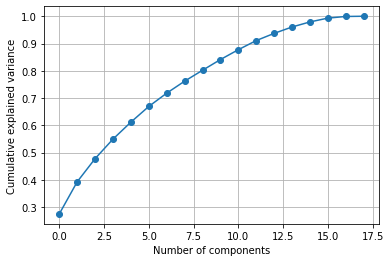

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid();

In [45]:
print(f'Explained variance in 2D : {sum(pca.explained_variance_ratio_[:2])}')

Explained variance in 2D : 0.39283034599301603


#### In 2 dimensions

In [46]:
pca2D = PCA(n_components=2)
pca2D.fit(X_train_scale)

X_train_pca = pd.DataFrame(data=pca2D.transform(X_train_scale), columns=['PC1', 'PC2'])
X_test_pca = pd.DataFrame(data=pca2D.transform(X_test_scale), columns=['PC1', 'PC2'])

In [47]:
fig = px.scatter(X_train_pca.assign(LeagueName = Y_train.reset_index()['LeagueName']),
                 x='PC1', y='PC2', color='LeagueName',
                 title='Scatter plot of the 2D PCA',
                 category_orders=category_orders, color_discrete_sequence= px.colors.sequential.Plasma_r,
                 width=800, height=400)
fig.show();

On this graph, we can see that the more your rank is high, the more you are on the left and inversly. The PC1 ax explains most of the data here. 
<br>If we zoom in the center, we can see that the data is really close to each other and so, do classification will be very very hard.

fig, ax = plt.subplots(figsize=(12, 5))
X_train_pca.plot(kind='scatter', x='PC1', y='PC2',
                 c=Y_train, cmap=plt.cm.get_cmap('OrRd', 5), ax=ax);
ax.set_title('2 Componenets PCA')
ax.grid();

#### On important features

In [48]:
imp_scaler = StandardScaler()
imp_X_scale = scaler.fit_transform(imp_X)

imp_pca2D = PCA(n_components=2)
imp_pca2D.fit(imp_X_scale)

imp_X_pca = pd.DataFrame(data=imp_pca2D.transform(imp_X_scale), columns=['PC1', 'PC2'])
print(f'Explained variance in 2D on important features : {sum(imp_pca2D.explained_variance_ratio_)}')

Explained variance in 2D on important features : 0.8157923387741024


In [49]:
fig = px.scatter(imp_X_pca.assign(LeagueName=imp_Y.reset_index()['LeagueName']),
                 x='PC1', y='PC2', color='LeagueName',
                 title='Scatter plot of the 2D PCA on important features',
                 color_discrete_sequence= px.colors.sequential.Plasma_r, category_orders=category_orders,
                 width=800, height=400)
fig.show();

This PCA seems better than the previous one, but still not very good, especially in the center of the graph where a lot of values are close to each other which means the classification is still really hard to do.

## Machine Learning models

### Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

### Confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix

### Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV

### SVM

In [53]:
from sklearn import svm

Using cross validation.

In [54]:
SVM = svm.SVC()
cv_svm = cross_val_score(SVM, X_train, Y_train, cv=10)
print(f'Cross validation mean : {cv_svm.mean()}')

Cross validation mean : 0.33320214161614015


Using grid search.

In [55]:
param_grid = {'C' : np.arange(60, 80)}
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

grid.best_score_, grid.best_params_

(0.3997397290695092, {'C': 79})

Fitting best parameters.

In [56]:
SVM = svm.SVC(C=76)
SVM.fit(X_train, Y_train)
print(f'Score of SVC model : {SVM.score(X_test, Y_test)}')

pred = SVM.predict(X_test)
confusion_matrix(y_true=Y_test, y_pred=pred, labels=list(league_names.values()))

Score of SVC model : 0.4037328094302554


array([[  3,  22,  13,  11,   1,   0,   0,   0],
       [  0,  29,  29,  39,   6,   1,   0,   0],
       [  1,  15,  39,  85,  21,   5,   0,   0],
       [  0,  11,  23, 111,  79,  19,   0,   0],
       [  0,   0,   4,  67, 129,  42,   0,   0],
       [  0,   0,   0,  16,  84,  85,   0,   1],
       [  1,   0,   0,   0,   3,   6,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  15]], dtype=int64)

As expected, in the middle leagues, the classification is really hard. 

### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

Using cross validation.

In [58]:
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn, X_train, Y_train, cv=10)
print(f'Cross validation mean : {cv_knn.mean()}')

Cross validation mean : 0.3352710704534978


Using grid search.

In [59]:
param_grid = {'n_neighbors' : np.arange(10, 35)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

grid.best_score_, grid.best_params_

(0.3702376193648679, {'n_neighbors': 26})

Fitting best parameters.

In [60]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train, Y_train)
print(f'Score of KNN Classifier model : {knn.score(X_test, Y_test)}')

pred = knn.predict(X_test)
print(f'Confusion matrix:\n {confusion_matrix(y_true=Y_test, y_pred=pred, labels=list(league_names.values()))}')

Score of KNN Classifier model : 0.3664047151277014
Confusion matrix:
 [[ 12  13  15   9   1   0   0   0]
 [  7  21  35  28  13   0   0   0]
 [  4  14  46  66  28   8   0   0]
 [  1  13  28  89  93  19   0   0]
 [  0   2  12  67 106  53   0   2]
 [  0   0   3  18  79  83   0   3]
 [  0   0   0   0   4   6   0   0]
 [  0   0   0   0   0   1   0  16]]


Same for the knn, models really strugle to classify points in the middle league.

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

Using cross validation.

In [62]:
rf = RandomForestClassifier()
cv_rf = cross_val_score(rf, X_train, Y_train, cv=10)
print(f'Cross validation mean : {cv_rf.mean()}')

Cross validation mean : 0.4098588802609651


Using grid search.

In [63]:
param_grid = {'n_estimators' : np.arange(100, 301, 100),
              'max_features' : ['sqrt', 'log2'],
              'criterion' : ['gini', 'entropy'],
              'oob_score' : [True, False]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

grid.best_score_, grid.best_params_

C:\Users\hugob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



(0.41827492782589387,
 {'criterion': 'entropy',
  'max_features': 'log2',
  'n_estimators': 200,
  'oob_score': True})

#[ans]{'criterion': 'gini',
  'max_features': 'sqrt',
  'n_estimators': 200,
  'oob_score': True}

In [64]:
rf = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=200, oob_score=True)
rf.fit(X_train, Y_train)
print(f'Score of RandomForest Classifier model : {rf.score(X_test, Y_test)}')

pred = rf.predict(X_test)
print(f'Confusion matrix:\n {confusion_matrix(y_true=Y_test, y_pred=pred, labels=list(league_names.values()))}')

Score of RandomForest Classifier model : 0.4548133595284872
Confusion matrix:
 [[ 17  21  10   1   0   1   0   0]
 [  6  32  36  25   5   0   0   0]
 [  9  18  58  68  10   3   0   0]
 [  4  10  38 119  61  11   0   0]
 [  0   4  14  61 107  56   0   0]
 [  0   0   3  15  54 113   1   0]
 [  0   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0   0  17]]


C:\Users\hugob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



### LDA

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Using cross validation.

In [66]:
lda = LinearDiscriminantAnalysis()
cv_lda = cross_val_score(lda, X_train, Y_train, cv=10)
print(f'Cross validation mean : {cv_lda.mean()}')

Cross validation mean : 0.3786423430131547


Using grid search.

In [67]:
param_grid = {'solver' : ['svd', 'lsqr', 'eigen']}
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

grid.best_score_, grid.best_params_

(0.3807763713080169, {'solver': 'svd'})

In [68]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print(f'Score of LDA model : {lda.score(X_test, Y_test)}')

pred = lda.predict(X_test)
print(f'Confusion matrix:\n {confusion_matrix(y_true=Y_test, y_pred=pred, labels=list(league_names.values()))}')

Score of LDA model : 0.4174852652259332
Confusion matrix:
 [[ 22  12   9   6   0   1   0   0]
 [ 15  19  27  39   3   1   0   0]
 [ 16  17  38  78  14   2   1   0]
 [  6   9  24 135  56  12   1   0]
 [  1   4   8  66 106  49   3   5]
 [  0   0   1  22  57  88  10   8]
 [  0   0   0   0   0   7   2   1]
 [  0   0   0   0   0   2   0  15]]


### Conclusion

Globally with all these models, we can not exceed 40% of accuracy when we want to predict the rank of the player which is not precise enough...
<br><br>Either than predicting the exact rank of the player, we could try to group up the ranks into different groups and then try to predict the group (novice, expert...) in which the player is. Since middle ranks classification is really hard, this way could give us a better accuracy and so a better use of our model.

## Predict in 2/3/4 groups

With our knowledge from the game and after some research, we came to the conclusion that we can split the ranks into three or four different groups, but we will also try to split the ranks into two different groups. Usually players in bronze or silver are considered as "new player" or "novice" and there is a gap quite big with players in ranks above them. 

#### With Gaussian Mixture

Let's try with 2 to 4 components on important features only.

In [69]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2)
gm.fit(X)
pred_n_2 = gm.predict(X)

In [101]:
fig = px.scatter(imp_X_pca, x='PC1', y='PC2', color=pred_n_2,
                 title='Gaussian Mixture with 2 components', size=pred_n_2+1,
                width=800, height=400)
fig.show();

In [71]:
gm = GaussianMixture(n_components=3)
gm.fit(X)
pred_n_3 = gm.predict(X)

In [102]:
fig = px.scatter(imp_X_pca, x='PC1', y='PC2', color=pred_n_3,
                 title='Gaussian Mixture with 3 components', size=pred_n_3+1,
                width=800, height=400)
fig.show();

In [73]:
gm = GaussianMixture(n_components=4)
gm.fit(X)
pred_n_4 = gm.predict(X)

In [100]:
fig = px.scatter(imp_X_pca, x='PC1', y='PC2', color=pred_n_4,
                 title='Gaussian mixture with 4 components', size=pred_n_4+1,
                width=800, height=400)
fig.show();

The output of a gaussian mixture with 4 components is not reliable because the clusters are too close to each other. Without zooming in, we can't distinguish more than two different clusters out of the four we have. Also, the variance within a cluster (for example cluster 3, the yellow one) is very high, which again, shows us that a 4 components gaussian mixture is not that effective.
<br><br>We got the same problem with the output of the gaussian mixture with 3 components.

But, on the other hand, a 2 components gaussian mixture seems quite good. Clusters look well defined (low variance within the cluster and high variance between clusters). 
<br>We can now think to define groups ourselves, without using a gaussian mixture.

#### With 4 groups predefined

We will group the leagues in 4 leagues : the novice, the competent, the expert and the pro.
<br> Let's see what it gives us.

In [75]:
novice = ['Bronze', 'Silver']
competent = ['Gold', 'Platinum']
expert = ['Diamond', 'Master']
pro = ['GrandMaster', 'Professional']

group4 = {'Bronze' : 'novice', 'Silver' : 'novice',
          'Gold' : 'competent', 'Platinum' : 'competent', 
          'Diamond' : 'expert', 'Master' : 'expert',
          'GrandMaster' : 'pro', 'Professional' : 'pro'}

Map the league name with its group.

In [76]:
data['Group4'] = data['LeagueName'].map(group4)

Splitting for applying Machine Learning models.

In [77]:
X = data[features]
Y = data['Group4']
X_train_4cat, X_test_4cat, Y_train_4cat, Y_test_4cat = train_test_split(X, Y, stratify=Y, test_size=0.3)

Try a Random Forest classifier.

In [78]:
rf = RandomForestClassifier()
cv_rf = cross_val_score(rf, X_train_4cat, Y_train_4cat, cv=10)
print(f'Cross validation mean : {cv_rf.mean()}')

Cross validation mean : 0.6819682303301067


In [79]:
rf.fit(X_train_4cat, Y_train_4cat)
pred = rf.predict(X_test_4cat)
print(f'Accuracy : {(pred == Y_test_4cat).mean()}')
confusion_matrix(y_true=Y_test_4cat, y_pred=pred, labels=list(set(group4.values())))

Accuracy : 0.6787819253438114


array([[ 70,   0,  80,   4],
       [  0,  12,   0,  15],
       [ 31,   0, 287,  91],
       [  1,   2, 103, 322]], dtype=int64)

Apply a grid search to find the best model.

In [80]:
param_grid = {'n_estimators' : np.arange(100, 301, 50),
              'max_features' : ['sqrt', 'log2', 'auto'],
              'criterion' : ['gini', 'entropy'],
              'oob_score' : [True, False]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=-1)
grid.fit(X_train_4cat, Y_train_4cat)

print(f'The score of the best model from our grid search with cross-validation is: {grid.best_score_} \nfor the parameters: {grid.best_params_}')

pred = grid.predict(X_test_4cat)
print(f'\nAccuracy : {(pred == Y_test_4cat).mean()}\n')
print(confusion_matrix(y_true=Y_test_4cat, y_pred=pred, labels=list(set(group4.values()))))

The score of the best model from our grid search with cross-validation is: 0.693759529128107 
for the parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 250, 'oob_score': True}

Accuracy : 0.6866404715127702

[[ 71   0  79   4]
 [  0  13   0  14]
 [ 30   0 291  88]
 [  1   1 102 324]]


C:\Users\hugob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



The accuracy is getting higher, it is easier to predict groups than the real rank of the player. This is true since some leagues have a small gap when it comes to players abilities.
<br>To continue testing, we can try with 3 groups.

#### With 3 groups predefined

Ranks will now be defined in 3 groups : novice, expert and pro.
<br>This is a more realistic approach since in many video games, we commonly define 3 groups of players. Novice are new players, expert are casual players and pro are really good player. 

In [81]:
novice = ['Bronze', 'Silver']
expert = ['Gold', 'Platinum', 'Diamond']
pro = ['Master', 'GrandMaster', 'Professional']

group3 = {'Bronze' : 'novice', 'Silver' : 'novice',
          'Gold' : 'expert', 'Platinum' : 'expert', 'Diamond' : 'expert',
          'Master' : 'pro', 'GrandMaster' : 'pro', 'Professional' : 'pro'}

Map the league name with its group.

In [82]:
data['Group3'] = data['LeagueName'].map(group3)

Splitting for applying Machine Learning models.

In [83]:
X = data[features]
Y = data['Group3']
X_train_3cat, X_test_3cat, Y_train_3cat, Y_test_3cat = train_test_split(X, Y, stratify=Y, test_size=0.3)

Try a Random Forest classifier.

In [84]:
rf = RandomForestClassifier()
cv_rf = cross_val_score(rf, X_train_3cat, Y_train_3cat, cv=10)
print(f'Cross validation mean : {cv_rf.mean()}')

Cross validation mean : 0.7362993298585258


In [85]:
rf.fit(X_train_3cat, Y_train_3cat)
pred = rf.predict(X_test_3cat)
print(f'Accuracy : {(pred == Y_test_3cat).mean()}')
confusion_matrix(y_true=Y_test_3cat, y_pred=pred, labels=list(set(group3.values())))

Accuracy : 0.7445972495088409


array([[ 82,   0,  72],
       [  0, 115,  98],
       [ 37,  53, 561]], dtype=int64)

In [86]:
param_grid = {'n_estimators' : np.arange(100, 301, 50),
              'max_features' : ['sqrt', 'log2', 'auto'],
              'criterion' : ['gini', 'entropy'],
              'oob_score' : [True, False]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=-1)
grid.fit(X_train_3cat, Y_train_3cat)

print(f'The score of the best model from our grid search with cross-validation is: {grid.best_score_} \nfor the parameters: {grid.best_params_}')

pred = grid.predict(X_test_3cat)
print(f'\nAccuracy : {(pred == Y_test_3cat).mean()}\n')
print(confusion_matrix(y_true=Y_test_3cat, y_pred=pred, labels=list(set(group3.values()))))

The score of the best model from our grid search with cross-validation is: 0.7430539304329327 
for the parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200, 'oob_score': True}

Accuracy : 0.74950884086444

[[ 81   0  73]
 [  0 116  97]
 [ 35  50 566]]


C:\Users\hugob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



This model is the best, it is a good and logical way to interpret this dataset.
<br>Just for fun, let's see how it goes with only 2 groups.

#### With 2 groups predefined

In [87]:
novice = ['Bronze', 'Silver', 'Gold', 'Platinum']
expert = ['Diamond', 'Master', 'GrandMaster', 'Professional']

group2 = {'Bronze' : 'novice', 'Silver' : 'novice', 'Gold' : 'novice', 'Platinum' : 'novice',
          'Diamond' : 'expert', 'Master' : 'expert', 'GrandMaster' : 'expert', 'Professional' : 'expert'}

Map the league name with its group.

In [88]:
data['Group2'] = data['LeagueName'].map(group2)

Splitting for applying Machine Learning models.

In [89]:
X = data[features]
Y = data['Group2']
X_train_2cat, X_test_2cat, Y_train_2cat, Y_test_2cat = train_test_split(X, Y, stratify=Y, test_size=0.3)

Try a Random Forest classifier.

In [90]:
rf = RandomForestClassifier()
cv_rf = cross_val_score(rf, X_train_2cat, Y_train_2cat, cv=10)
print(f'Cross validation mean : {cv_rf.mean()}')

Cross validation mean : 0.8129684785306528


In [91]:
rf.fit(X_train_2cat, Y_train_2cat)
pred = rf.predict(X_test_2cat)
print(f'Accuracy : {(pred == Y_test_2cat).mean()}')
confusion_matrix(y_true=Y_test_2cat, y_pred=pred, labels=list(set(group2.values())))

Accuracy : 0.7966601178781926


array([[472,  92],
       [115, 339]], dtype=int64)

In [92]:
param_grid = {'n_estimators' : np.arange(100, 301, 50),
              'max_features' : ['sqrt', 'log2', 'auto'],
              'criterion' : ['gini', 'entropy'],
              'oob_score' : [True, False]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=-1)
grid.fit(X_train_2cat, Y_train_2cat)

print(f'The score of the best model from our grid search with cross-validation is: {grid.best_score_} \nfor the parameters: {grid.best_params_}')

pred = grid.predict(X_test_2cat)
print(f'\nAccuracy : {(pred == Y_test_2cat).mean()}\n')
print(confusion_matrix(y_true=Y_test_2cat, y_pred=pred, labels=list(set(group2.values()))))

The score of the best model from our grid search with cross-validation is: 0.820545686629082 
for the parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300, 'oob_score': False}

Accuracy : 0.8015717092337917

[[474  90]
 [112 342]]


The accuracy is good, but in reality, it is not very interesting to classify players in 2 groups since there are a lot of differents possible rank in each group. This is not that interesting.

#### Conclusion of grouping

The best grouping is the 4 groups or 3 groups, depending on what we want to do. Using the 4 groups would make us loose accuracy but is more interesting than 3 groups. The main difference is that in 4 groups, platinum and diamond leagues are not in the same group. This is really interesting because as players, we know there is a high gap of level and expertise between these two groups. Also, in common games, the ratio of platinum players over diamond players is high so they should not be grouped together.